<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/DS_WEEK_2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from sklearn.decomposition import PCA

# Load the dataset
file_path="/content/sampledata_asignment2 - sampledata_asignment2.csv"
df = pd.read_csv(file_path)

# Task 1: Data Loading and Initial Exploration
print("Task 1: Data Loading and Initial Exploration")
print(df.head())  # Display the first few rows
print(df.info())  # Check data types and missing values


Task 1: Data Loading and Initial Exploration
   StudentID  Gender Category  Feature1  Feature2  Feature3
0          1    Male        A        78        45       102
1          2  Female        B        92        68       120
2          3    Male        A        85        52       112
3          4  Female        C        72        49        98
4          5    Male        C        95        74       135
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StudentID  25 non-null     int64 
 1   Gender     25 non-null     object
 2   Category   25 non-null     object
 3   Feature1   25 non-null     int64 
 4   Feature2   25 non-null     int64 
 5   Feature3   25 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB
None


In [ ]:

# Task 2: Data Cleaning
print("\nTask 2: Data Cleaning")
# Handle missing values (e.g., impute with mean, median, or interpolate)
df.fillna(df.median(), inplace=True)

# Detect and address outliers using z-scores
z_scores = np.abs((df[['Feature1', 'Feature2', 'Feature3']] - df[['Feature1', 'Feature2', 'Feature3']].mean()) / df[['Feature1', 'Feature2', 'Feature3']].std())
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with outliers

df


Task 2: Data Cleaning


<ipython-input-4-2d71e60657a2>:4: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,StudentID,Gender,Category,Feature1,Feature2,Feature3
0,1,Male,A,78,45,102
1,2,Female,B,92,68,120
2,3,Male,A,85,52,112
3,4,Female,C,72,49,98
4,5,Male,C,95,74,135
5,6,Female,B,88,65,118
6,7,Male,A,105,40,96
7,8,Female,C,70,46,100
8,9,Male,C,76,53,110
9,10,Female,B,85,70,130



Task 3: Univariate Analysis


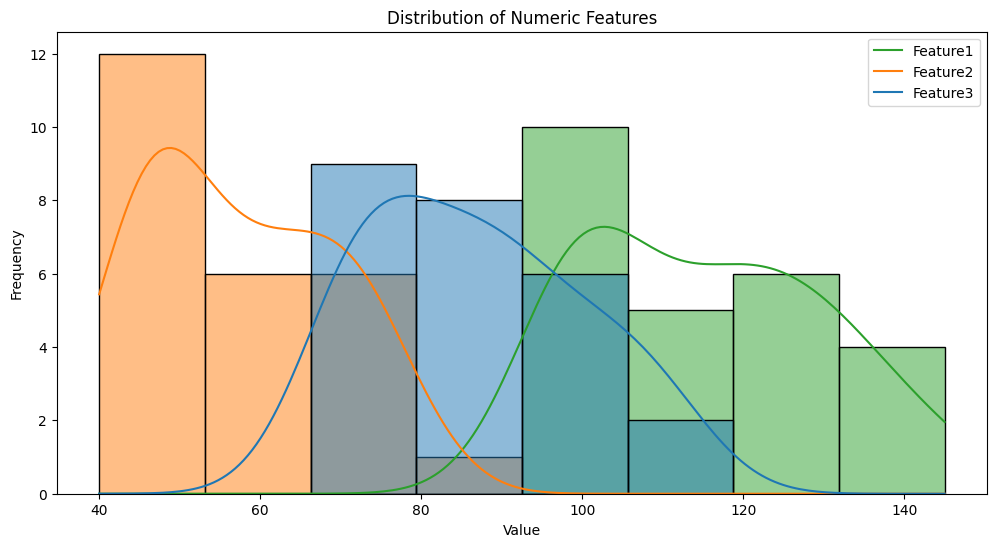

In [ ]:
# Task 3: Univariate Analysis
print("\nTask 3: Univariate Analysis")
# Visualize the distribution of numeric variables
plt.figure(figsize=(12, 6))
sns.histplot(data=df[['Feature1', 'Feature2', 'Feature3']], kde=True)
plt.title('Distribution of Numeric Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Feature1', 'Feature2', 'Feature3'])
plt.show()


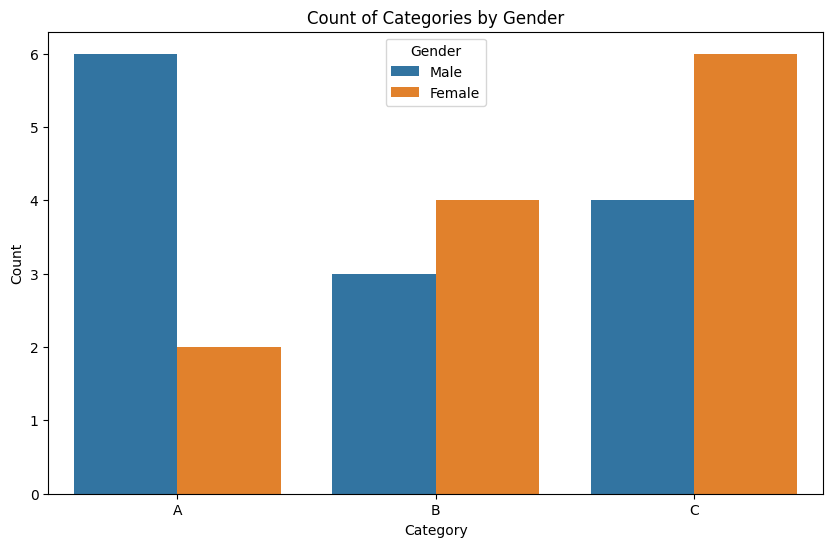

In [ ]:

# Analyze the distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Gender')
plt.title('Count of Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [ ]:

# Calculate advanced summary statistics
advanced_stats = df.describe(percentiles=[0.25, 0.75, 0.95, 0.99])
print("Advanced Summary Statistics:")
print(advanced_stats)


Advanced Summary Statistics:
       StudentID    Feature1   Feature2    Feature3
count  25.000000   25.000000  25.000000   25.000000
mean   13.000000   86.760000  57.520000  115.160000
std     7.359801   13.305012  11.758401   14.803378
min     1.000000   68.000000  40.000000   96.000000
25%     7.000000   76.000000  48.000000  100.000000
50%    13.000000   85.000000  57.000000  115.000000
75%    19.000000   95.000000  68.000000  125.000000
95%    23.800000  109.000000  74.800000  139.000000
99%    24.760000  111.520000  78.800000  143.800000
max    25.000000  112.000000  80.000000  145.000000



Task 4: Bivariate and Multivariate Analysis


<ipython-input-8-b81b99b8ec28>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



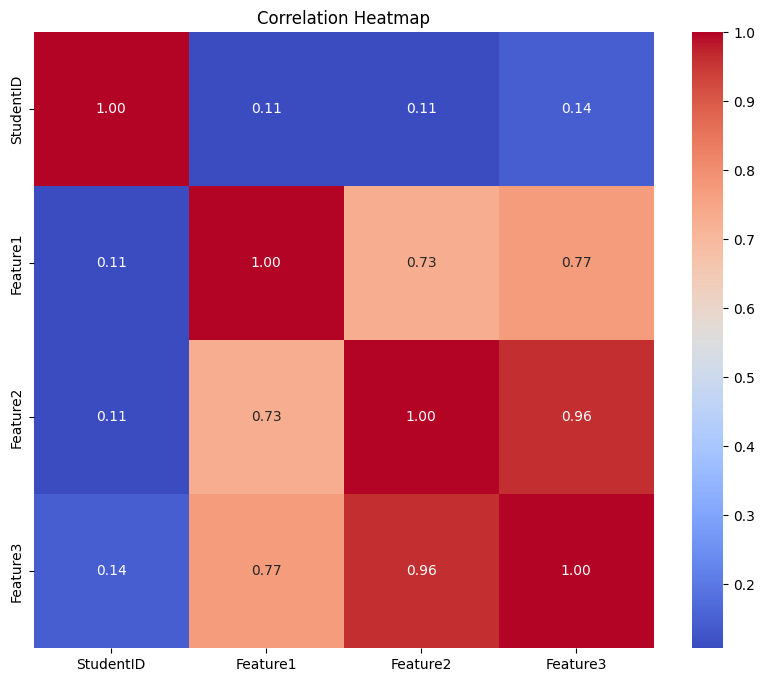

In [ ]:

# Task 4: Bivariate and Multivariate Analysis
print("\nTask 4: Bivariate and Multivariate Analysis")
# Explore relationships between variables using a heatmap of correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


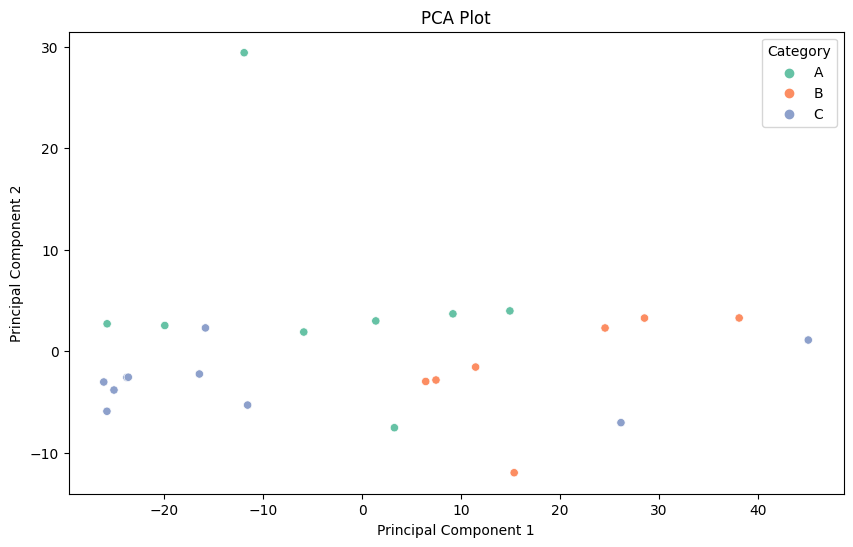

In [ ]:

# Apply dimensionality reduction techniques (e.g., PCA)
X = df[['Feature1', 'Feature2', 'Feature3']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Category'], palette='Set2')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:

# Task 5: Hypothesis Testing and Statistical Inference
print("\nTask 5: Hypothesis Testing and Statistical Inference")
# Example Hypothesis 1: There is a significant difference in Feature1 between genders.
male_feature1 = df[df['Gender'] == 'Male']['Feature1']
female_feature1 = df[df['Gender'] == 'Female']['Feature1']
t_stat_gender, p_value_gender = ttest_ind(male_feature1, female_feature1)
print(f'T-test for Feature1 (Male vs. Female): t-statistic={t_stat_gender}, p-value={p_value_gender}')



Task 5: Hypothesis Testing and Statistical Inference
T-test for Feature1 (Male vs. Female): t-statistic=0.8101209912167822, p-value=0.42617358749243384


In [ ]:

# Example Hypothesis 2: There is a significant difference in Feature2 among categories.
category_groups = [group['Feature2'] for name, group in df.groupby('Category')]
f_stat_category, p_value_category = f_oneway(*category_groups)
print(f'ANOVA for Feature2 among categories: F-statistic={f_stat_category}, p-value={p_value_category}')


ANOVA for Feature2 among categories: F-statistic=5.711189596731075, p-value=0.01005167654679752


In [ ]:

# Task 6: Advanced Insights and Recommendations
print("\nTask 6: Advanced Insights and Recommendations")
# Extract advanced insights and patterns, provide recommendations

# Task 7: Data Visualization Mastery (Extra Credit)
# Create customized and interactive data visualizations using advanced libraries

# Task 8: Advanced Visualization
print("\nTask 8: Advanced Visualization")

# Example: Creating an interactive scatter plot using Plotly
import plotly.express as px

fig = px.scatter(df, x='Feature1', y='Feature2', color='Category', size='Feature3',
                 title='Interactive Scatter Plot')
fig.show()





Task 6: Advanced Insights and Recommendations

Task 8: Advanced Visualization


In [ ]:

# Task 9: Feature Engineering
print("\nTask 9: Feature Engineering")

# Example: Creating a new feature 'Feature4' as a combination of 'Feature1' and 'Feature2'
df['Feature4'] = df['Feature1'] + df['Feature2']
print("New Feature 'Feature4':")
print(df['Feature4'])

# Assess the impact of feature engineering
print("\nImpact of Feature Engineering:")
correlation_matrix_with_feature4 = df.corr()
print(correlation_matrix_with_feature4['Feature4'])





Task 9: Feature Engineering
New Feature 'Feature4':
0     123
1     160
2     137
3     121
4     169
5     153
6     145
7     116
8     129
9     155
10    160
11    127
12    185
13    116
14    142
15    117
16    192
17    146
18    114
19    158
20    177
21    126
22    120
23    147
24    172
Name: Feature4, dtype: int64

Impact of Feature Engineering:
StudentID    0.115129
Feature1     0.938432
Feature2     0.920432
Feature3     0.927034
Feature4     1.000000
Name: Feature4, dtype: float64


<ipython-input-13-cae7cca70585>:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.




Task 10: Time Series Analysis


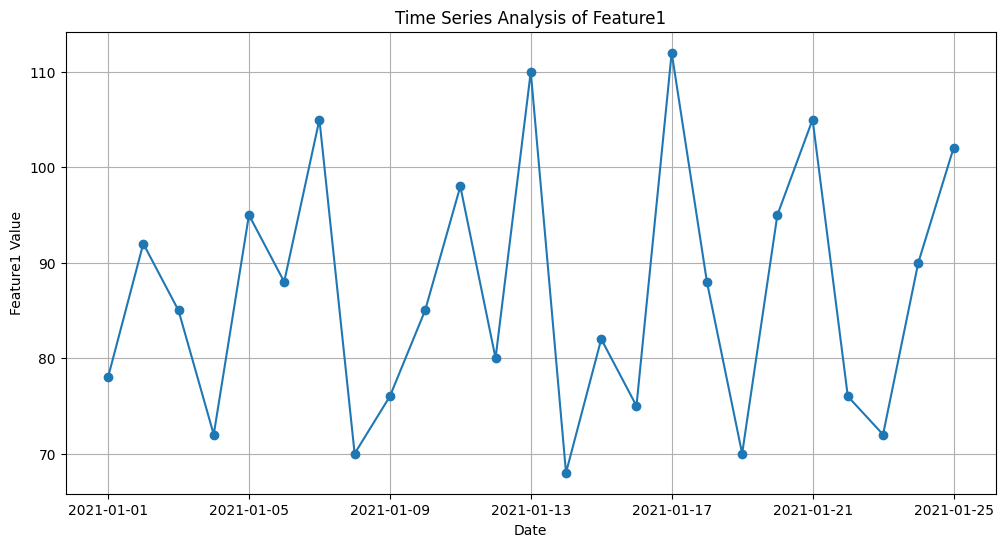

In [ ]:

# Task 10: Time Series Analysis
print("\nTask 10: Time Series Analysis")

# Example: If applicable, perform time series analysis on a relevant variable
# (e.g., 'Feature1' as a time series variable)
df['Date'] = pd.date_range(start='1/1/2021', periods=len(df), freq='D')
time_series_df = df[['Date', 'Feature1']]
time_series_df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(time_series_df, marker='o')
plt.title('Time Series Analysis of Feature1')
plt.xlabel('Date')
plt.ylabel('Feature1 Value')
plt.grid(True)
plt.show()





Task 13: Outlier Detection and Handling


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



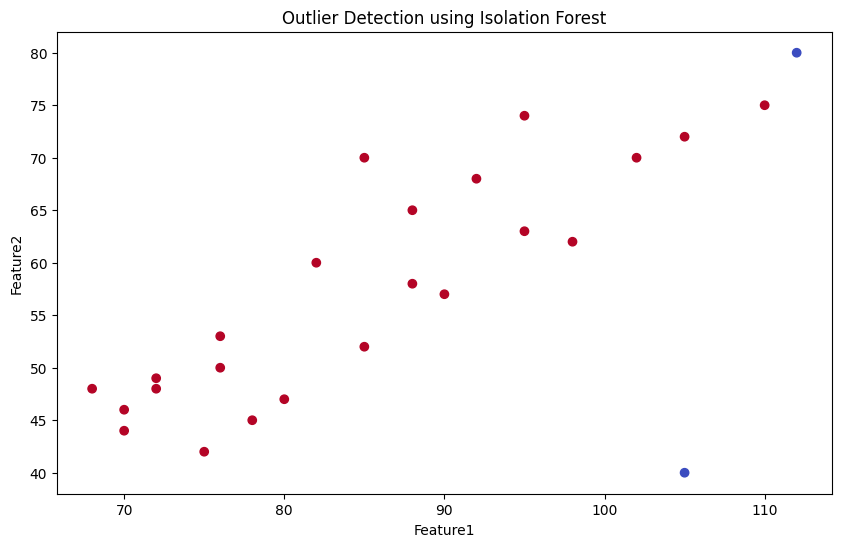

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:

# Task 13: Outlier Detection and Handling
print("\nTask 13: Outlier Detection and Handling")

# Example: Detecting outliers using Isolation Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
outliers = clf.fit_predict(df[['Feature1', 'Feature2', 'Feature3']])

# Visualize the identified outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=outliers, cmap='coolwarm', marker='o')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Handling outliers (e.g., removing rows with outliers)
df_no_outliers = df[outliers == 1]
df_no_outliers




Task 14: Clustering Analysis


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



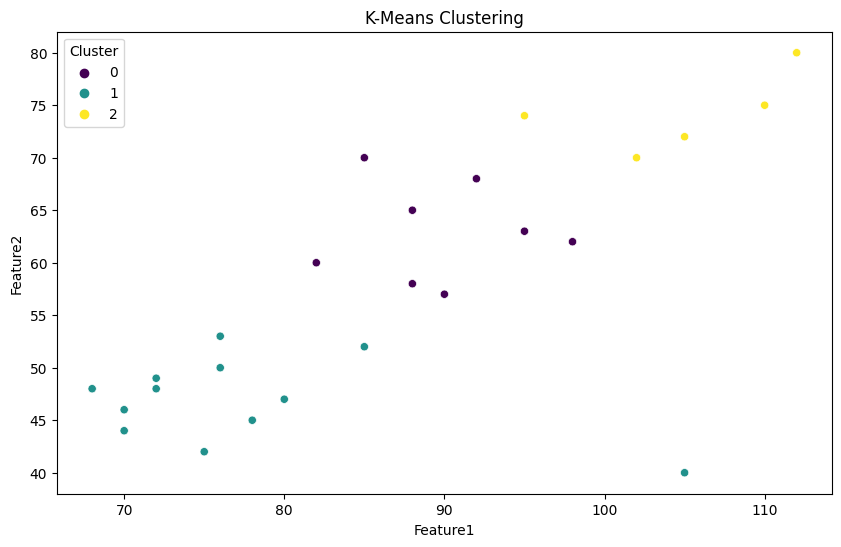

In [ ]:


# Task 14: Clustering Analysis
print("\nTask 14: Clustering Analysis")

# Example: Performing K-Means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Feature1', 'Feature2', 'Feature3']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



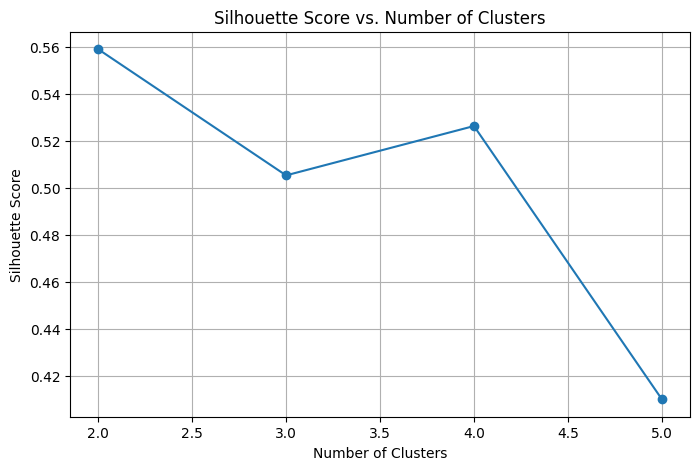

In [ ]:

# Determine the optimal number of clusters (e.g., using the Elbow Method)
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()




Task 15: Anomaly Detection


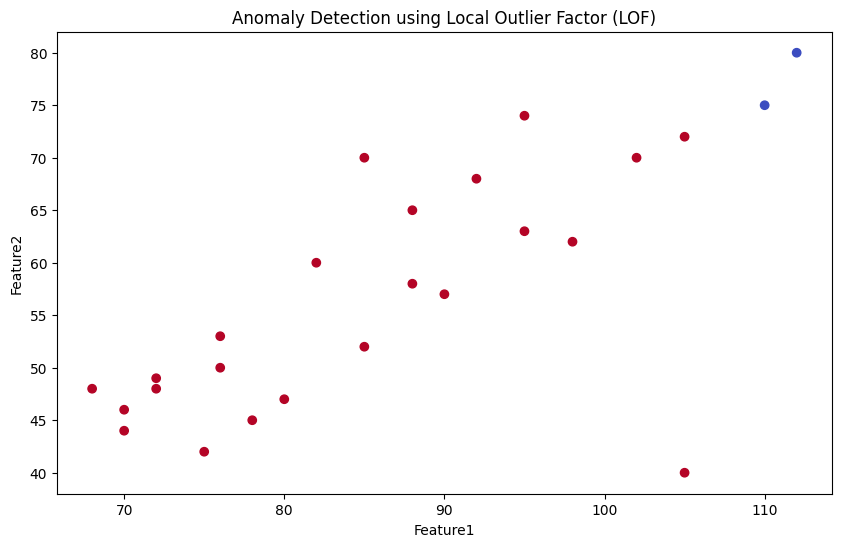

In [ ]:

# Task 15: Anomaly Detection
print("\nTask 15: Anomaly Detection")

# Example: Detecting anomalies using Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
anomalies = lof.fit_predict(df[['Feature1', 'Feature2', 'Feature3']])

# Visualize the identified anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=anomalies, cmap='coolwarm', marker='o')
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Discuss potential reasons for the detected anomalies.




In [ ]:

# Task 16: Predictive Modeling
print("\nTask 16: Predictive Modeling")

# Example: Predicting 'Feature1' using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Feature2', 'Feature3']]
y = df['Feature1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate the model's performance
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Discuss the model's strengths and limitations.


Task 16: Predictive Modeling
Root Mean Squared Error (RMSE): 4.512511066274827
